<a href="https://colab.research.google.com/github/victoralves87/analiseDados-colab/blob/main/ETL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
df.rename(columns={
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'housing_median_age': 'Idade_media_residencial',
    'total_rooms': 'Total_comodos',
    'total_bedrooms': 'Total_quartos',
    'population': 'Populacao',
    'households': 'Familias',
    'median_income': 'Renda_media',
    'median_house_value': 'Valor_medio_casa'
}, inplace=True)

df.columns

Index(['Longitude', 'Latitude', 'Idade_media_residencial', 'Total_comodos',
       'Total_quartos', 'Populacao', 'Familias', 'Renda_media',
       'Valor_medio_casa'],
      dtype='object')

In [5]:
df.isnull().sum()
df.describe()

,Longitude,Latitude,Idade_media_residencial,Total_comodos,Total_quartos,Populacao,Familias,Renda_media,Valor_medio_casa
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# Lista de colunas que você quer arredondar
colunas_arredondar = [
    'Longitude', 'Latitude', 'Idade_media_residencial', 'Total_comodos',
    'Total_quartos', 'Populacao', 'Familias', 'Renda_media', 'Valor_medio_casa'
]

df[colunas_arredondar] = df[colunas_arredondar].round(2)

# Mostrando resultado após o arredondamento
print("\n=== Estatísticas com Arredondamento de 2 casas decimais ===")
print(df.describe())


=== Estatísticas com Arredondamento de 2 casas decimais ===
          Longitude      Latitude  Idade_media_residencial  Total_comodos  \
count  17000.000000  17000.000000             17000.000000   17000.000000   
mean    -119.562108     35.625225                28.589353    2643.664412   
std        2.005166      2.137340                12.586937    2179.947071   
min     -124.350000     32.540000                 1.000000       2.000000   
25%     -121.790000     33.930000                18.000000    1462.000000   
50%     -118.490000     34.250000                29.000000    2127.000000   
75%     -118.000000     37.720000                37.000000    3151.250000   
max     -114.310000     41.950000                52.000000   37937.000000   

       Total_quartos     Populacao      Familias   Renda_media  \
count   17000.000000  17000.000000  17000.000000  17000.000000   
mean      539.410824   1429.573941    501.221941      3.883575   
std       421.499452   1147.852959    384.52084

In [8]:
df['densidade_populacional'] = df['Populacao'] / df['Familias']
df.head()

,Longitude,Latitude,Idade_media_residencial,Total_comodos,Total_quartos,Populacao,Familias,Renda_media,Valor_medio_casa,densidade_populacional
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.49,66900.0,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.65,85700.0,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.19,73400.0,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.92,65500.0,2.381679


In [9]:
df['densidade_populacional'] = df['densidade_populacional'].round(2)
df.head()

,Longitude,Latitude,Idade_media_residencial,Total_comodos,Total_quartos,Populacao,Familias,Renda_media,Valor_medio_casa,densidade_populacional
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.49,66900.0,2.15
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0,2.44
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.65,85700.0,2.85
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.19,73400.0,2.28
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.92,65500.0,2.38


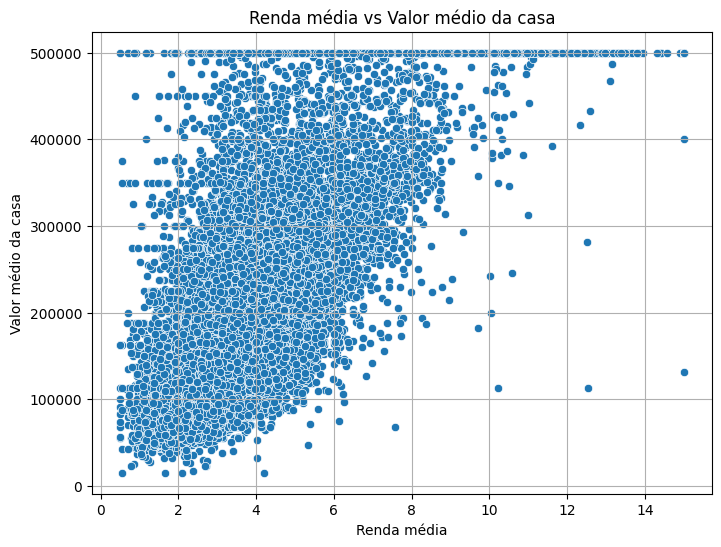

In [10]:
#renda média x valor da casa
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Renda_media', y='Valor_medio_casa')
plt.title('Renda média vs Valor médio da casa')
plt.xlabel('Renda média')
plt.ylabel('Valor médio da casa')
plt.grid(True)
plt.show()

### Em geral, parece haver uma correlação positiva entre a renda média e o valor médio da casa. Isso significa que, à medida que a renda média aumenta, o valor médio da casa também tende a aumentar.**No entanto**, essa relação não é linear. Em determinado momento, o aumento da renda não se traduz em um aumento significativo no valor da casa. Isso pode ser observado na parte superior do gráfico, onde muitos pontos se agrupam em torno de um valor máximo de aproximadamente 500.000, independentemente de a renda continuar aumentando. A maioria dos pontos se concentra na faixa de renda média entre 2 e 6, indicando que a maioria dos dados está dentro dessa faixa de renda.

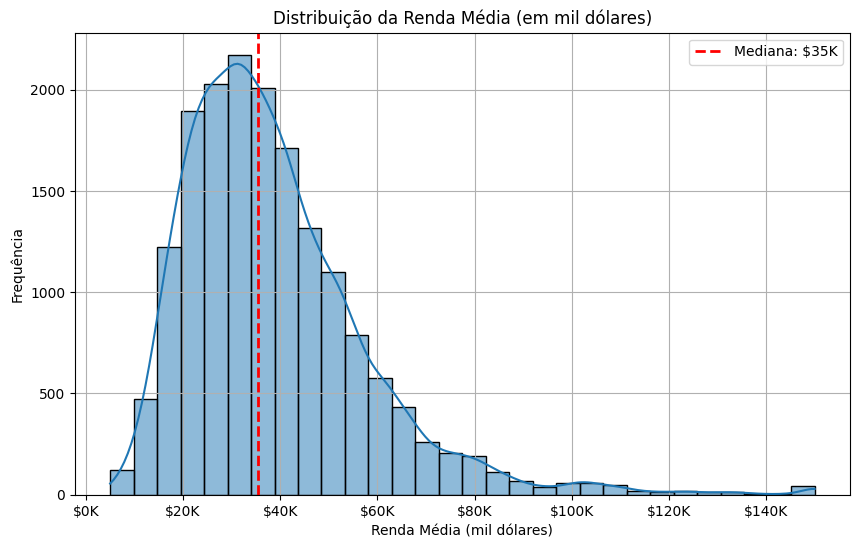

In [11]:
import matplotlib.ticker as mtick

# Converter para mil dólares
df['Renda_media_mil_dolares'] = df['Renda_media'] * 10

# Calcular a mediana
mediana = df['Renda_media_mil_dolares'].median()

# Plotar
plt.figure(figsize=(10,6))
sns.histplot(df['Renda_media_mil_dolares'], bins=30, kde=True)

# Linha da mediana
plt.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:.0f}K')

plt.title('Distribuição da Renda Média (em mil dólares)')
plt.xlabel('Renda Média (mil dólares)')
plt.ylabel('Frequência')
plt.grid(True)

# Formatar o eixo x para milhar (ex: $30K)
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x:,.0f}K'))

plt.legend()
plt.show()


In [14]:
# quais variáveis estão mais associadas ao Valor_medio_casa

# Selecionar colunas relevantes para correlação
colunas_para_correlacao = [
    'Idade_media_residencial',
    'Total_comodos',
    'Total_quartos',
    'Populacao',
    'Familias',
    'Renda_media',
    'Valor_medio_casa'
]

df_corr = df[colunas_para_correlacao]



# Calcular a correlação
matriz_corr = df_corr.corr()

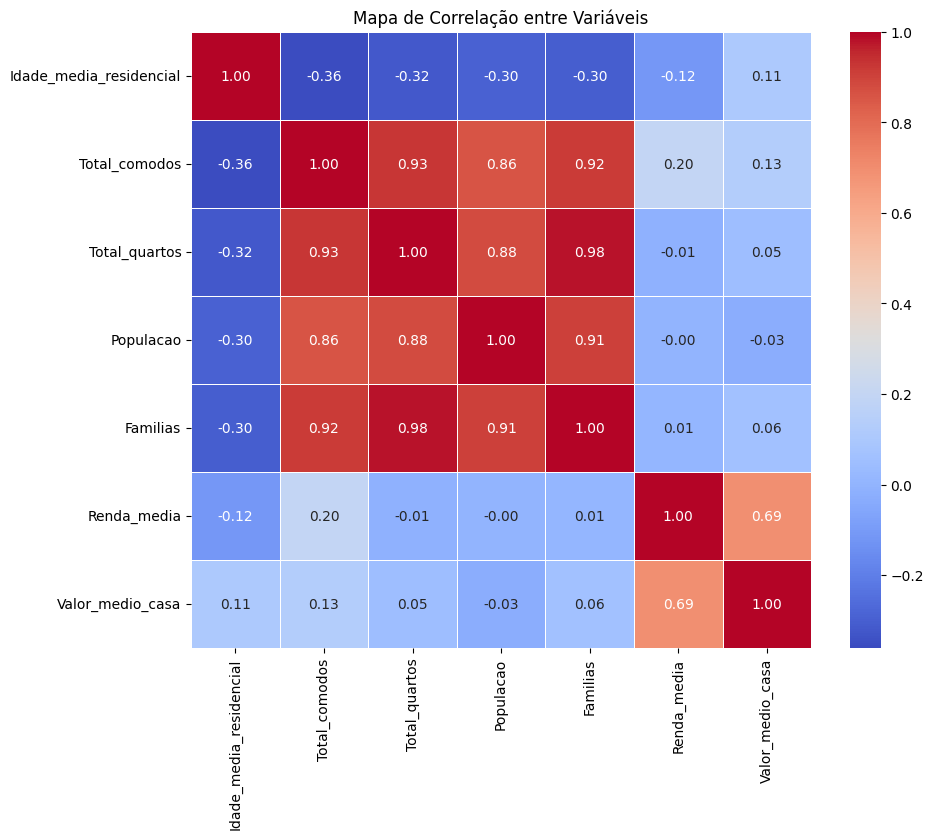

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Mapa de Correlação entre Variáveis')
plt.show()


## O mapa de calor de correlação fornece um resumo das relações pairwise entre as variáveis. Ele confirma a importância da renda na determinação do valor da casa, mas também destaca a necessidade de considerar outros fatores e a possível presença de multicolinearidade entre algumas variáveis.